In [1]:
import openmc
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

import sens_helpers
from sens_helpers.plotting import plot_source, plot_adjoint, plot_all_sens, plot_xs_sens, get_tallies_from_dir, hist_y

In [2]:
# sens_folder = '/home/icmeyer/research/wmp_sensitivity_problems/problems/pu-sol-therm-034-015/sensitivity_run'
Ts = [273, 900]
sens_Ts = {}
for T in Ts:
    path = '/home/icmeyer/research/wmp_sensitivity_problems/problems/pu-sol-therm-034-015/{:d}/sensitivity_run/'.format(T)
    sens_Ts[T] = get_tallies_from_dir(path)

H1 multipole none
H1 curve_fit none
H1 cross_section fission
H1 cross_section absorption
H1 cross_section elastic
O16 multipole none
O16 curve_fit none
O16 cross_section fission
O16 cross_section absorption
O16 cross_section elastic
O17 multipole none
O17 curve_fit none
O17 cross_section fission
O17 cross_section absorption
O17 cross_section elastic
Fe54 multipole none
Fe54 curve_fit none
Fe54 cross_section fission
Fe54 cross_section absorption
Fe54 cross_section elastic
Fe56 multipole none
Fe56 curve_fit none
Fe56 cross_section fission
Fe56 cross_section absorption
Fe56 cross_section elastic
Fe57 multipole none
Fe57 curve_fit none
Fe57 cross_section fission
Fe57 cross_section absorption
Fe57 cross_section elastic
Fe58 multipole none
Fe58 curve_fit none
Fe58 cross_section fission
Fe58 cross_section absorption
Fe58 cross_section elastic
Cr50 multipole none
Cr50 curve_fit none
Cr50 cross_section fission
Cr50 cross_section absorption
Cr50 cross_section elastic
Cr52 multipole none
Cr52 cur

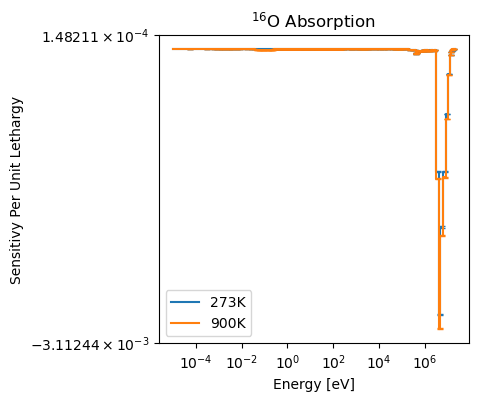

In [5]:
def plot_sens_err(ax, e_bins, sens, sens_sd=None, label=''):
    mids = (e_bins[:-1] + e_bins[1:])/2
    step = ax.step(e_bins, hist_y(sens), label=label)
    if sens_sd is not None:
        ax.errorbar(mids, sens, yerr=sens_sd, capsize=2, 
                    capthick=1, fmt=' ', color=step[0].get_color())

        
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
var = 'cross_section'
rxns = ['fission', 'absorption', 'elastic']
reaction = 'absorption'
nuc = 'O16'

for T in Ts:
    e_bins = sens_Ts[T][nuc][var][reaction]['energy']
    sens = sens_Ts[T][nuc][var][reaction]['mean']
    sens = sens/(np.log(e_bins[1:]) - np.log(e_bins[:-1]))
    sd = sens_Ts[T][nuc][var][reaction]['sd']
    # plot_sens_err(ax, e_bins, sens, sens_sd=sd, normalize=True, label=str(T))
    plot_sens_err(ax, e_bins, sens, sens_sd=sd, label=str(T)+'K')
ax.set_yscale('symlog')
ax.set_xscale('log')
ax.set_ylabel('Sensitivy Per Unit Lethargy')
ax.set_xlabel('Energy [eV]')
ax.set_title('$^{16}$O Absorption')
ax.legend()

In [4]:
plot = openmc.Plot()
# Along z-axis
plot.basis = 'xy'
plot.origin = (0, 0, 70)
plot.width = (100., 100.)
plot.pixels = (400, 400)
plot.to_ipython_image()

CalledProcessError: Command 'openmc -p' returned non-zero exit status 255.

In [ ]:
plot = openmc.Plot()
# Along x-axis
plot.basis = 'yz'
plot.origin = (0, 0, 70)
plot.width = (200., 200.)
plot.pixels = (400, 400)
plot.to_ipython_image()

In [ ]:
plot = openmc.Plot()
# Along y-axis
plot.basis = 'xz'
plot.origin = (21.59, 0, 70)
plot.width = (200., 200.)
plot.pixels = (400, 400)
plot.to_ipython_image()

In [ ]:
from sens_helpers.plotting import plot_source
source_figs = plot_source(is2D)
for fig in source_figs:
    fig.show()

In [ ]:
adjoint_figs = plot_adjoint(is2D)
for fig in adjoint_figs:
    fig.show()

In [ ]:
rxns = ['fission', 'absorption', 'elastic']
var_words = ['cross_section', 'multipole', 'curve_fit']
nuclides = sens_helpers.openmc_help.get_nucs_from_mat_xml('materials.xml')
figs = plot_all_sens(nuclides, rxns, var_words)
for fig in figs:
    fig.show()
